# Benettin Algortihm

In this notebook we will develop the code for the Bennetin algorithm to find the Lyapunov spectrum of L96.

In [1]:
# Standard Imports

import numpy as np
import numpy.linalg as la
import xarray as xr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# L96 Tangent Integrator Import
import l96adaptive as l96t

## Functions Needed for the Benettin Algorithm

In [2]:
def posQR(M):
    """ Returns QR decomposition of a matrix with positive diagonals on R.
    Parameter, M: Array that is being decomposed
    """
    Q, R = la.qr(M) # Performing QR decomposition
    signs = np.diag(np.sign(np.diagonal(R))) # Matrix with signs of R diagonal on the diagonal
    Q, R = np.dot(Q, signs), np.dot(signs, R) # Ensuring R Diagonal is positive
    return Q, R

In [25]:
runner = l96t.Integrator()

In [31]:
# Initialising orthogonal matrix

eps = 1.e-15
oldQ = eps * np.identity(runner.size)
oldQ[0, 1] = eps * 1

# Will be stretched matrix i.e. P = QR
P = np.random.rand(runner.size, runner.size) 

# Stretching rates after QR decomposition
R = np.random.rand(runner.size, runner.size)

# Time between QR Decompositions
tau = 1.e-2

In [34]:
# Where we are in phase space before ginelli step
phase_state = runner.state
time = runner.time

# Stretching first column
runner.set_state(phase_state, oldQ.T[0]) # First column of Q is ic for TLE
runner.integrate(tau)

# First column of Stretched matirx
P[:, 0] = runner.tangent_state

# Stretching the rest of the columns
for i, column in enumerate(oldQ.T[1:]):

    # Reseting to where we were in phase space
    runner.set_state(phase_state, column)
    runner.time = time

    runner.integrate(tau)
    P[:, i] = runner.tangent_state

oldQ, R = posQR(P)
ftle = np.log(np.diag(R))/(tau)
ftle_ts.append(ftle)

UnboundLocalError: local variable 'oldQ' referenced before assignment

In [35]:
ftle_ts = []
for i in tqdm(range(10)):
    # Where we are in phase space before ginelli step
    phase_state = runner.state
    time = runner.time

    # Stretching first column
    runner.set_state(phase_state, oldQ.T[0]) # First column of Q is ic for TLE
    runner.integrate(tau)

    # First column of Stretched matirx
    P[:, 0] = runner.tangent_state

    # Stretching the rest of the columns
    for i, column in enumerate(oldQ.T[1:]):

        # Reseting to where we were in phase space
        runner.set_state(phase_state, column)
        runner.time = time

        runner.integrate(tau)
        P[:, i] = runner.tangent_state

    oldQ, R = posQR(P)
    ftle = np.log(np.diag(R))/(tau)
    ftle_ts.append(ftle)

KeyboardInterrupt: 

In [37]:
%%timeit

#posQR(P)
runner.integrate(tau)

24.9 ms ± 982 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
a = ftle_ts[0]
b = ftle_ts[1]
F = np.vstack(ftle_ts)

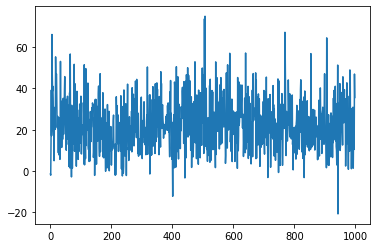

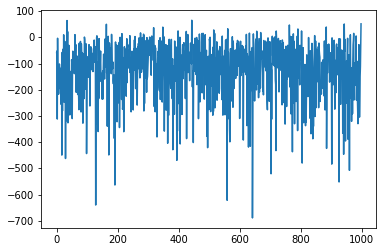

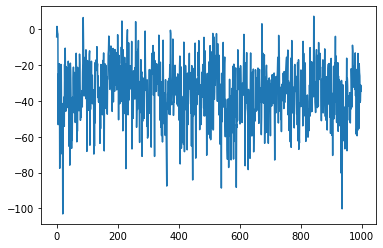

In [24]:
plt.plot(F[1:, 1])
plt.show()
plt.plot(F[1:, -1])
plt.show()
plt.plot(F[1:, -2])

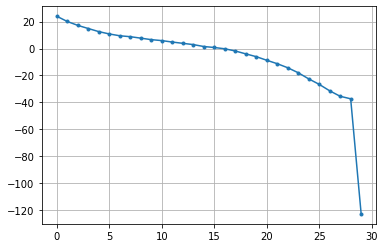

In [10]:
plt.plot(np.mean(F, axis=0), '.-')
plt.grid()
plt.show()

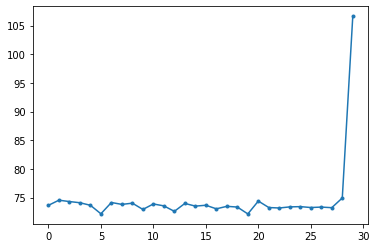

In [11]:
plt.plot(np.std(F, axis=0), '.-')